### pack all raw files into one pkl (for every dir)

In [9]:
import pickle

In [7]:
import os
pdg_list = os.listdir("../SARD_raw/pdg_db_dir013/")
pdg_dict = {}
for p in pdg_list:
    if p != ".keep" and p != ".ipynb_checkpoints":
        print("\r# processing {}/{}".format(len(pdg_dict), len(pdg_list)), end="")
        pdg_dict[p] = {}
        sub_list = os.listdir("../SARD_raw/pdg_db_dir013/{}/".format(p))
        for q in sub_list:
            if q != ".keep" and q != ".ipynb_checkpoints":
                with open("../SARD_raw/pdg_db_dir013/{}/{}".format(p,q), "rb") as f:
                    tmp_pdg = pickle.load(f)
                pdg_dict[p][q] = tmp_pdg

# processing 999/1001

In [8]:
with open("../SARD_pkl/pdg_db_dir013.pkl", "wb") as f:
    pickle.dump(pdg_dict, f)

### merge all ready pkl by category

In [14]:
# batch_list = ["001", "002", "003", "004", "005", "006", "008", "009", "011", "012", "014"]
batch_list = ["001", "002", "003", "004", "005", "006", "007", "008", "009", "010", "011", "012", "013", "014"]
subgraph_type = "sensitive"
sg = []
for p in batch_list:
    print("# merging {}".format(p))
    with open("../SARD_ready/{}_subgraphs_dir{}.pkl".format(subgraph_type, p), "rb") as f:
        dt = pickle.load(f)
    sg += dt

# with open("../SARD_ready/{}_subgraphs_all_e3.pkl".format(subgraph_type), "wb") as f:
#     pickle.dump(sg, f)
with open("../SARD_ready/{}_subgraphs_all_1hop.pkl".format(subgraph_type), "wb") as f:
    pickle.dump(sg, f)

# merging 001
# merging 002
# merging 003
# merging 004
# merging 005
# merging 006
# merging 007
# merging 008
# merging 009
# merging 010
# merging 011
# merging 012
# merging 013
# merging 014


In [23]:
# show some statistics
tmp_labels = [p[0] for p in sg]
from collections import Counter
display(Counter(tmp_labels))
len(sg)

Counter({False: 60301, True: 16661})

76962

### merge all category into one pkl

In [15]:
all_cat = []
for cat in ["arrayuse", "integer", "pointuse", "sensitive"]:
    print("# merging {}".format(cat))
#     with open("../SARD_ready/{}_subgraphs_all_e3.pkl".format(cat), "rb") as f:
#         dt = pickle.load(f)
    with open("../SARD_ready/{}_subgraphs_all_1hop.pkl".format(cat), "rb") as f:
        dt = pickle.load(f)
    all_cat += dt

# with open("../SARD_ready/all_subgraphs_all_e3.pkl", "wb") as f:
#     pickle.dump(all_cat, f)
with open("../SARD_ready/all_subgraphs_all_1hop.pkl", "wb") as f:
    pickle.dump(all_cat, f)

# merging arrayuse
# merging integer
# merging pointuse
# merging sensitive


In [25]:
len(all_cat)

413462

### stats

In [26]:
from collections import Counter
# batch_list = ["001", "002", "003", "004", "005", "006", "008", "009", "011", "012", "014"]
batch_list = ["001", "002", "003", "004", "005", "006", "007", "008", "009", "010", "011", "012", "013", "014"]
# batch_list = ["001", "014", ]
cat_list = ["arrayuse", "integer", "pointuse", "sensitive"]
stats_dict = {
    ('batch',):[],
    ('arrayuse', 0):[],
    ('arrayuse', 1):[],
    ('integer', 0):[],
    ('integer', 1):[],
    ('pointuse', 0):[],
    ('pointuse', 1):[],
    ('sensitive', 0):[],
    ('sensitive', 1):[],
    ('total', 0):[],
    ('total', 1):[],
}
for p in batch_list:
    print("# processing {}".format(p))
    stats_dict[('batch',)].append(p)
    tot_labels = []
    for q in cat_list:
        with open("./SARD_ready/{}_subgraphs_dir{}.pkl".format(q,p), "rb") as f:
            dt = pickle.load(f)
        # show some statistics
        tmp_labels = [z[0] for z in dt]
        tot_labels += tmp_labels
        tmp_counter = Counter(tmp_labels)

        stats_dict[(q,0)].append("{} ({:.0f}%)".format(tmp_counter[False], tmp_counter[False]/len(tmp_labels)*100))
        stats_dict[(q,1)].append("{} ({:.0f}%)".format(tmp_counter[True], tmp_counter[True]/len(tmp_labels)*100))
    tot_counter = Counter(tot_labels)
    stats_dict[('total',0)].append("{} ({:.0f}%)".format(tot_counter[False], tot_counter[False]/len(tot_labels)*100))
    stats_dict[('total',1)].append("{} ({:.0f}%)".format(tot_counter[True], tot_counter[True]/len(tot_labels)*100))
    

# processing 001
# processing 002
# processing 003
# processing 004
# processing 005
# processing 006
# processing 007
# processing 008
# processing 009
# processing 010
# processing 011
# processing 012
# processing 013
# processing 014


In [82]:
import pandas as pd
pd.DataFrame.from_dict(stats_dict)

batch    arrayuse                integer                pointuse  \
     NaN           0           1          0          1            0   
0    001  4806 (80%)  1236 (20%)  366 (79%)   96 (21%)  11202 (90%)   
1    002  4065 (77%)  1230 (23%)  302 (73%)  110 (27%)  10500 (89%)   
2    003  4366 (79%)  1143 (21%)  308 (78%)   87 (22%)  10823 (90%)   
3    004  4405 (78%)  1249 (22%)  278 (72%)  110 (28%)  10592 (89%)   
4    005  4278 (78%)  1187 (22%)  211 (69%)   95 (31%)   9839 (88%)   
5    006  4562 (80%)  1149 (20%)  332 (76%)  103 (24%)  11170 (90%)   
6    008  3983 (79%)  1048 (21%)  318 (76%)  100 (24%)  10553 (90%)   
7    009  4364 (77%)  1282 (23%)  266 (74%)   94 (26%)  10350 (89%)   
8    011  4172 (77%)  1219 (23%)  277 (72%)  108 (28%)  10701 (89%)   
9    012  4384 (79%)  1166 (21%)  235 (70%)  101 (30%)  10160 (90%)   
10   014  4119 (78%)  1171 (22%)  259 (71%)  106 (29%)  10359 (88%)   

                  sensitive                    total              
             1            0           1            0           1  
0   1274 (10%)  10135 (85%)  1817 (15%)  26509 (86%)  4423 (14%)  
1   1361 (11%)   9534 (83%)  1995 (17%)  24401 (84%)  4696 (16%)  
2   1202 (10%)  10540 (85%)  1829 (15%)  26037 (86%)  4261 (14%)  
3   1297 (11%)   9728 (84%)  1892 (16%)  25003 (85%)  4548 (15%)  
4   1318 (12%)   9577 (83%)  1991 (17%)  23905 (84%)  4591 (16%)  
5   1211 (10%)  10248 (85%)  1854 (15%)  26312 (86%)  4317 (14%)  
6   1198 (10%)   9715 (84%)  1803 (16%)  24569 (86%)  4149 (14%)  
7   1248 (11%)   9684 (83%)  1926 (17%)  24664 (84%)  4550 (16%)  
8   1263 (11%)   9580 (84%)  1831 (16%)  24730 (85%)  4421 (15%)  
9   1147 (10%)   9379 (84%)  1789 (16%)  24158 (85%)  4203 (15%)  
10  1364 (12%)   9806 (82%)  2118 (18%)  24543 (84%)  4759 (16%)

In [27]:
import pandas as pd
pd.DataFrame.from_dict(stats_dict)

batch    arrayuse                integer                pointuse  \
     NaN           0           1          0          1            0   
0    001  4806 (80%)  1236 (20%)  366 (79%)   96 (21%)  11202 (90%)   
1    002  4065 (77%)  1230 (23%)  302 (73%)  110 (27%)  10500 (89%)   
2    003  4366 (79%)  1143 (21%)  308 (78%)   87 (22%)  10823 (90%)   
3    004  4405 (78%)  1249 (22%)  278 (72%)  110 (28%)  10592 (89%)   
4    005  4278 (78%)  1187 (22%)  211 (69%)   95 (31%)   9839 (88%)   
5    006  4562 (80%)  1149 (20%)  332 (76%)  103 (24%)  11170 (90%)   
6    007  4501 (80%)  1147 (20%)  334 (76%)  104 (24%)  11528 (91%)   
7    008  3983 (79%)  1048 (21%)  318 (76%)  100 (24%)  10553 (90%)   
8    009  4364 (77%)  1282 (23%)  266 (74%)   94 (26%)  10350 (89%)   
9    010  4072 (77%)  1192 (23%)  350 (76%)  109 (24%)  10736 (89%)   
10   011  4172 (77%)  1219 (23%)  277 (72%)  108 (28%)  10701 (89%)   
11   012  4384 (79%)  1166 (21%)  235 (70%)  101 (30%)  10160 (90%)   
12   013  4224 (77%)  1242 (23%)  262 (77%)   79 (23%)  10349 (88%)   
13   014  4119 (78%)  1171 (22%)  259 (71%)  106 (29%)  10359 (88%)   

                  sensitive                    total              
             1            0           1            0           1  
0   1274 (10%)  10135 (85%)  1817 (15%)  26509 (86%)  4423 (14%)  
1   1361 (11%)   9534 (83%)  1995 (17%)  24401 (84%)  4696 (16%)  
2   1202 (10%)  10540 (85%)  1829 (15%)  26037 (86%)  4261 (14%)  
3   1297 (11%)   9728 (84%)  1892 (16%)  25003 (85%)  4548 (15%)  
4   1318 (12%)   9577 (83%)  1991 (17%)  23905 (84%)  4591 (16%)  
5   1211 (10%)  10248 (85%)  1854 (15%)  26312 (86%)  4317 (14%)  
6    1191 (9%)  10453 (85%)  1802 (15%)  26816 (86%)  4244 (14%)  
7   1198 (10%)   9715 (84%)  1803 (16%)  24569 (86%)  4149 (14%)  
8   1248 (11%)   9684 (83%)  1926 (17%)  24664 (84%)  4550 (16%)  
9   1307 (11%)   9877 (84%)  1887 (16%)  25035 (85%)  4495 (15%)  
10  1263 (11%)   9580 (84%)  1831 (16%)  24730 (85%)  4421 (15%)  
11  1147 (10%)   9379 (84%)  1789 (16%)  24158 (85%)  4203 (15%)  
12  1360 (12%)   9673 (83%)  1934 (17%)  24508 (84%)  4615 (16%)  
13  1364 (12%)   9806 (82%)  2118 (18%)  24543 (84%)  4759 (16%)

### others

In [ ]:
with open("./SARD_ready/all_subgraphs_all_e3.pkl", "rb") as f:
    dt = pickle.load(f)

In [40]:
len(dt)

128771

In [45]:
dt[206]

(False, (<igraph.Graph at 0x7f1fb220c6d8>, '672666'))

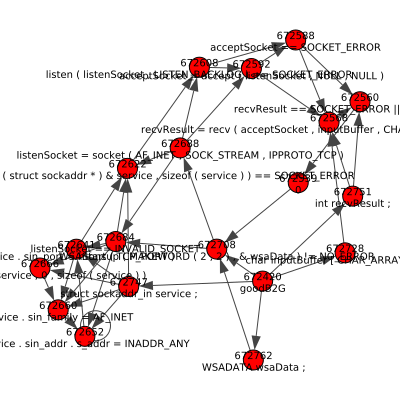

In [44]:
from igraph import *
tmp_graph = dt[206][1][0]
# tmp_graph = dt[k0][k1]
for p in tmp_graph.vs:
    p["label_size"]=10
visual_style = {}
visual_style["margin"]=40
visual_style["bbox"]=(400,400)
visual_style["vertex_label"] = [
    "{} \n {}".format(tmp_graph.vs["name"][i], tmp_graph.vs["code"][i]) 
    for i in range(len(tmp_graph.vs["code"]))
]
plot(tmp_graph, **visual_style)